In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

In [2]:
#1
# A bank found that the average number of cars waiting during the noon hour 
# at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the 
# probability of cars waiting at the drive-up window.

Text(0.5, 1.0, 'Poisson distribution of mean = 2')

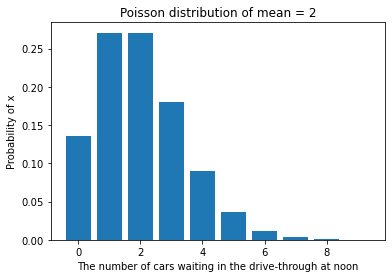

In [3]:
#1
mean = 2
x = np.arange(0,10)
y = stats.poisson(mean).pmf(x) # gives the probability of y for every x

plt.bar(x, y)
plt.xlabel('The number of cars waiting in the drive-through at noon')
plt.ylabel('Probability of x')
plt.title('Poisson distribution of mean = 2')

In [4]:
#1
# What is the probability that no cars drive up in the noon hour?
stats.poisson(mean).pmf(0)

0.1353352832366127

In [5]:
#1
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(mean).sf(2)

0.32332358381693654

In [6]:
#1
# How likely is it that the drive through gets at least 1 car?
stats.poisson(mean).sf(0)

0.8646647167633873

In [13]:
#2
# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:

grades = stats.norm(3, 0.3)

In [14]:
#2
# What grade point average is required to be in the top 5% of the graduating class?

grades.isf(0.05)

3.4934560880854417

In [17]:
# check using simulation

(np.random.normal(3, 0.3, 100_000) > 3.49).mean()

0.05104

In [15]:
#2
# What GPA constitutes the bottom 15% of the class?

grades.ppf(0.15)

2.689069983151863

In [21]:
# check using simulation

(np.random.normal(3, 0.3, 100_000) < 2.68).mean()

0.14336

In [22]:
#2
# An eccentric alumnus left scholarship money for students in the third decile 
# from the bottom of their class. Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

# third decile is lower 20 - 30 percentile
# 0.2 - 0.3
lower_bound = grades.ppf(0.2)
upper_bound = grades.ppf(0.3)
print(f'the range is between {lower_bound} and {upper_bound}')


the range is between 2.7475136299281258 and 2.842679846187588


In [25]:
# or do this way

grades.ppf([0.2, 0.3])

array([2.74751363, 2.84267985])

In [27]:
# or using simulation
np.quantile(np.random.normal(3, 0.3, 100_000), 0.2)

2.7473940907381427

In [28]:
# or using simulation
np.quantile(np.random.normal(3, 0.3, 100_000), 0.3)

2.8401206209979954

In [29]:
#2
# If I have a GPA of 3.5, what percentile am I in?
grades.cdf(3.5)

0.9522096477271853

In [31]:
# check using simulation
(np.random.normal(3, 0.3, 100_000) < 3.5).mean()

0.95091

In [34]:
#3
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

# binomial distribution
n_trials = 4326
p = 0.02 # chance of click-through
stats.binom(n_trials, p).sf(96)

0.1397582363130086

In [41]:
# check using simulation
n_rows = 1_000
n_cols = 4326
outcomes = [0, 1]
p_s = 0.02
p_f = 0.98
data = np.random.choice(outcomes, (n_rows * n_cols), p = [p_f, p_s]).reshape(n_rows, n_cols)
(data.sum(axis=1) > 96).mean()

0.123

In [42]:
# check using poisson
lam = 4326 * 0.02
stats.poisson(lam).sf(96)

0.14211867659283192

In [44]:
#4
# You are working on some statistics homework consisting of 100 questions 
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

# binomial distribution
n_trials = 60 # we are looking only at 60 answers, not all 100 questions
p = 0.01

number_correct = stats.binom(n_trials, p)
number_correct.sf(0)

0.4528433576092388

In [45]:
# check using simulation
n_rows = 100_000
n_cols = 60
outcomes = [0, 1]
p_s = 0.01
p_f = 0.99
data = np.random.choice(outcomes, (n_rows * n_cols), p = [p_f, p_s]).reshape(n_rows, n_cols)
(data.sum(axis=1) > 0).mean()

0.45167

In [46]:
#5
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they 
# visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit 
# the break area. How likely is it that the break area gets cleaned up each day? 

n_trials = round(0.9*3*22)
p = 0.03 # chance a student cleans the room, chance of success

cleanings = stats.binom(n_trials, p)
cleanings.sf(0) # chance the room is cleaned more that 0 times

0.8342199288437355

In [50]:
# check using simulation
n_rows = 10_000
n_cols = round(0.9*3*22)
outcomes = [0, 1]
data = np.random.choice(outcomes, (n_rows * n_cols), p = [0.97, 0.03]).reshape(n_rows, n_cols)
(data.sum(axis=1) > 0).mean()

0.8312

In [53]:
#5
# How likely is it that it goes two days without getting cleaned up?
n = n_trials * 2
p = 0.03

stats.binom(n, p).pmf(0)

0.02748303199257623

In [57]:
# check using simulation
n_rows = 100_000
n_cols = round(2 * 0.9 * 3 * 22)
outcomes = [0, 1]
p_f = 0.97
p_s = 0.03
data = np.random.choice(outcomes, (n_rows * n_cols), p = [p_f, p_s]).reshape(n_rows, n_cols)
(data.sum(axis=1) == 0).mean()

0.02792

In [59]:
#5
# All week?
n = n_trials * 5
p = 0.03
stats.binom(n, p).pmf(0)

0.00012521651388091353

In [61]:
# check using simulation
n_rows = 100_000
n_cols = round(5 * 0.9 * 3 * 22)
outcomes = [0, 1]
p_f = 0.97
p_s = 0.03
data = np.random.choice(outcomes, (n_rows, n_cols), p = [p_f, p_s]).reshape(n_rows, n_cols)
(data.sum(axis=1) == 0).mean()

0.00017

In [62]:
#6
# You want to get lunch at La Panaderia, but notice that the line is usually very long 
# at lunchtime. After several weeks of careful observation, you notice that the 
# average number of people in line when your lunch break starts is normally distributed 
# with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person 
# to order, and 10 minutes from ordering to getting your food, what is the likelihood 
# that you have at least 15 minutes left to eat your food before you have to go back 
# to class? Assume you have one hour for lunch, and ignore travel time to and from 
# La Panaderia.

# convert mean and standard deviation to minutes
# mean = 15 *2 = 30
# std_dev = 3 * 2 = 6
# max time to wait: 60 min - 15 - 10 = 35 minutes

stats.norm(30, 6).cdf(35)

0.7976716190363569

In [64]:
# check using simulation
(np.random.normal(30, 6, 100_000) < 35).mean()

0.79673

In [9]:
#7
# Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, 
# calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation 
# then compare this answer to the actual values present in the salaries dataset.

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

query = '''
select *
from employees
join salaries using(emp_no)
where to_date > now()
'''

employees = pd.read_sql(query, url)


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [15]:
# find the average salary of current employees, along with the standard deviation. 

avg_salary = employees.salary.mean()
stdev_salary = employees.salary.std()
print(avg_salary)
print(stdev_salary)

72012.23585730705
17309.99538025198


In [16]:
# model the employees salaries with a normal distribution defined 
# by the calculated mean and standard deviation. 
# then compare this answer to the actual values present in the salaries dataset.employees

#normal distribution
salary_dist = stats.norm(avg_salary, stdev_salary)

In [17]:
#7
# What percent of employees earn less than 60,000?
salary_dist.cdf(60_000)

0.24385742480214423

In [18]:
#7
# What percent of employees earn more than 95,000?
salary_dist.sf(95_000)

0.09208819199804053

In [21]:
#7
# What percent of employees earn between 65,000 and 80,000?

#np.diff(salary_dist.cdf([65_000, 80_000]))

# or
salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350605685446666

In [22]:
#7
# What do the top 5% of employees make?
salary_dist.isf(0.05)

100484.64454102777

In [ ]:
# grades.quantile(.95).values